# Assignment 1: EE708
## Dhruv Gupta, 240354


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category='FutureWarning')
plt.style.use("ggplot")

7. A gasoline manufacturer is investigating the “cold start ignition time” of an automobile engine. The
following times (in seconds) were obtained for a test vehicle: 1.75, 1.92, 2.62, 2.35, 3.09, 3.15,
2.53, 1.91. Calculate the sample mean, sample variance, and sample standard deviation. Construct
a box plot of the data. A second formulation of the gasoline was tested in the same vehicle, with the
following times (in seconds): 1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, and 3.35. Use
these new data, along with the cold start times reported in the previous exercise, to construct
comparative box plots. Write an interpretation of the information that you see in these plots.

Sample mean for first sample: 2.415
Sample variance for first sample: 0.28537142857142855
Sample standard deviation for first sample: 0.534201674062735


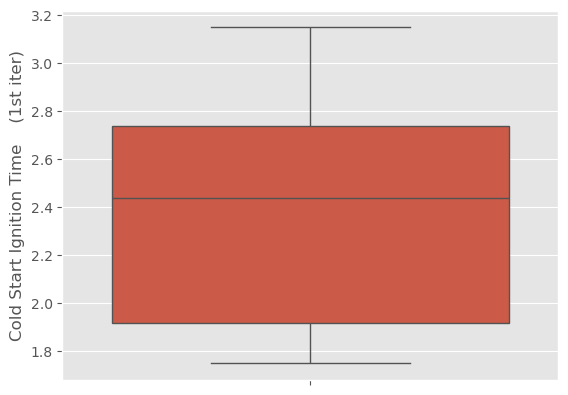

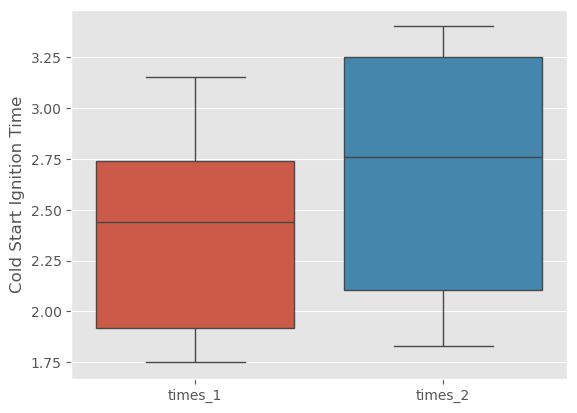

In [162]:
times_1 = [1.75, 1.92, 2.62, 2.35, 3.09, 3.15, 2.53, 1.91, None, None]
times_2 = [1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, 3.35]
times = pd.DataFrame({'times_1': times_1, 'times_2':times_2})

print(f"Sample mean for first sample: {times['times_1'].mean()}") #sample mean
print(f"Sample variance for first sample: {times['times_1'].var()}") #sample variance
print(f"Sample standard deviation for first sample: {times['times_1'].std()}") #sample std

#box plot
p =  sns.boxplot(data=times['times_1'])
p.set(ylabel='Cold Start Ignition Time    (1st iter)')
plt.show()

#comparitive box plot
q = sns.boxplot(data=times); q.set(ylabel = 'Cold Start Ignition Time')
plt.show()

8. A set of 10 hypothetical patient records from a large database are presented in Table 1. Patients
with a diabetes value of 1 have type-II diabetes, and patients with a diabetes value of 0 do not have
type-II diabetes.\
a. Create a new column by normalizing the Weight (kg) variable into the range 0-1 using the minmax normalization.\
b. Create a new column by binning the Weight (kg) variable into three categories: low (less than 60 kg), medium (60-100 kg), and high (greater than 100 kg).\
c. Create an aggregated column, body mass index (BMI, which is defined by the formula:
BMI = Weight (kg)/(Height (m))^2

In [163]:
df = pd.DataFrame({
    'Name': ["P. Lee", "R. Jones", "J. Smith", "A. Patel", "M. Owen", "S. Green", "N. Cook", "W. Hands", "P. Rice", "F. Marsh"],
    'Weight': [50, 115, 96, 41, 79, 109, 73, 104, 64, 136],
    'Height': [1.52, 1.77, 1.83, 1.55, 1.82, 1.89, 1.76, 1.71, 1.74, 1.78],
    'Systolic BP': [68, 110, 88, 76, 65, 114, 108, 107, 101, 121],
    'Diastolic BP': [112, 154, 136, 125, 105, 159, 136, 145, 132, 165],
    'Diabetes': [0, 1, 0, 0, 0, 1, 0, 1, 0, 1]    
})

In [164]:
# a part
minwt = df['Weight'].min() 
maxwt = df['Weight'].max()
df['norm_weight'] = round((df['Weight'] - minwt) / (maxwt-minwt),3)

# b part
df['wtcategory'] = 0
for i in range(len(df)):
    if df['Weight'][i] < 60:
        df['wtcategory'] = np.where(df['Weight'] < 60, 'low', df['wtcategory'])
    elif (df['Weight'][i] >= 60) and (df['Weight'][i] <= 100):
        df.iloc[i, df.columns.get_loc('wtcategory')] = 'medium'
    else:
        df['wtcategory'] = np.where(df['Weight'] > 100, 'high', df['wtcategory'])
        
# c part
df['BMI'] = round(df['Weight'] / ((df['Height'])*(df['Height'])),3)

df.sort_values(by='norm_weight',ascending=True,inplace=True)
df.head(100)

,Name,Weight,Height,Systolic BP,Diastolic BP,Diabetes,norm_weight,wtcategory,BMI
3,A. Patel,41,1.55,76,125,0,0.000,low,17.066
0,P. Lee,50,1.52,68,112,0,0.095,low,21.641
8,P. Rice,64,1.74,101,132,0,0.242,medium,21.139
6,N. Cook,73,1.76,108,136,0,0.337,medium,23.567
4,M. Owen,79,1.82,65,105,0,0.400,medium,23.850
2,J. Smith,96,1.83,88,136,0,0.579,medium,28.666
7,W. Hands,104,1.71,107,145,1,0.663,high,35.566
5,S. Green,109,1.89,114,159,1,0.716,high,30.514
1,R. Jones,115,1.77,110,154,1,0.779,high,36.707
9,F. Marsh,136,1.78,121,165,1,1.000,high,42.924


9. Table 2 shows a series of retail transactions monitored by the main office of a computer store.\
a. Create a histogram of Sale Price (dollars) using the following intervals: 0 to less than 250, 250 to
less than 500, 500 to less than 750, and 750 to less than 1000.\
b. Generate a contingency table summarizing the variables Store and Product category.\
c. Generate the following summary tables:\
i. Grouping by Customer with a count of the number of observations and the sum of the Sale
price (dollars) for each row.\
ii. Grouping by Store with a count of the number of observations and the mean Sale price (dollars)
for each row.\
iii. Grouping by Product category with a count of the number of observations and the sum of the
Profit (dollars) for each row.\
d. Create a scatterplot showing Sales price (dollars) against Profit (dollars).


In [165]:
dt = pd.DataFrame({
    'Customer': ["B. March", "B. March", "B. March", "J. Bain", "T. Goss", "T. Goss", "L. Nye", "L. Nye", "S. Cann", "E. Sims", "P. Judd", "P. Judd", "G. Hinton", "G. Hinton", "G. Hinton", "G. Hinton", "H. Fu", "H. Taylor"],
    'Store': ["New York, NY", "New York, NY", "New York, NY", "New York, NY", "Washington, DC", "Washington, DC", "New York, NY", "New York, NY", "Washington, DC", "Washington, DC", "New York, NY", "New York, NY", "Washington, DC", "Washington, DC", "Washington, DC", "Washington, DC", "New York, NY", "New York, NY"],
    'Product Category': ["Laptop", "Printer", "Scanner", "Scanner", "Printer", "Scanner", "Desktop", "Printer", "Desktop", "Laptop", "Desktop", "Scanner", "Laptop", "Desktop", "Printer", "Scanner", "Desktop", "Scanner"],
    'Product Description': ["DR2984", "FW288", "BW9338", "BW9443", "FW199", "BW39339", "LR21", "FW299", "LR21", "DR2983", "LR22", "FJ3999", "DR2983", "LR21", "FW288", "BW9443", "ZX88", "BW9338"],
    'Sale Price ($)': [950, 350, 400, 500, 200, 550, 600, 300, 600, 700, 700, 200, 700, 600, 350, 500, 450, 400],
    'Profit ($)': [190, 105, 100, 125, 60, 140, 60, 90, 60, 140, 70, 50, 140, 60, 105, 125, 45, 100]
})
dt.head()

,Customer,Store,Product Category,Product Description,Sale Price ($),Profit ($)
0,B. March,"New York, NY",Laptop,DR2984,950,190
1,B. March,"New York, NY",Printer,FW288,350,105
2,B. March,"New York, NY",Scanner,BW9338,400,100
3,J. Bain,"New York, NY",Scanner,BW9443,500,125
4,T. Goss,"Washington, DC",Printer,FW199,200,60


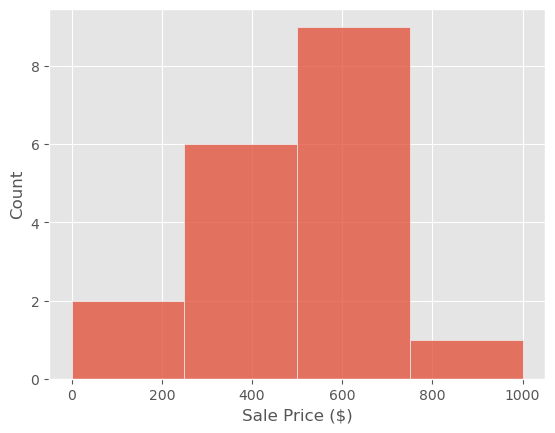

In [166]:
# a part
sns.histplot(data=dt['Sale Price ($)'], binrange=[0,1000], binwidth=250)
plt.show()

In [167]:
# b part
pd.crosstab(dt['Store'], dt['Product Category'])

Product Category,Desktop,Laptop,Printer,Scanner
Store,,,,
"New York, NY",3,1,2,4
"Washington, DC",2,2,2,2


In [168]:
# c part (part i)
gt = dt.groupby('Customer')
rt = pd.DataFrame({
    'Count': gt['Customer'].value_counts(),
    'Total Sale': gt['Sale Price ($)'].sum()
})

print("part 1 output")
print(rt.head(100))

# c part (part ii)
gf = dt.groupby('Store')
rf = pd.DataFrame({
    'Count': gf['Store'].value_counts(),
    'Mean Sales ($)': gf['Sale Price ($)'].mean()
})
print("\npart 2 output")
print(rf.head(100))

# c part, part iii
gl = dt.groupby('Product Category')
rl = pd.DataFrame({
    'Count': gl['Product Category'].value_counts(),
    'Net Profit ($)': gl['Profit ($)'].sum()
})
print("\npart 3 output")
print(rl.head(100))

part 1 output
           Count  Total Sale
Customer                    
B. March       3        1700
E. Sims        1         700
G. Hinton      4        2150
H. Fu          1         450
H. Taylor      1         400
J. Bain        1         500
L. Nye         2         900
P. Judd        2         900
S. Cann        1         600
T. Goss        2         750

part 2 output
                Count  Mean Sales ($)
Store                                
New York, NY       10           485.0
Washington, DC      8           525.0

part 3 output
                  Count  Net Profit ($)
Product Category                       
Desktop               5             295
Laptop                3             470
Printer               4             360
Scanner               6             640


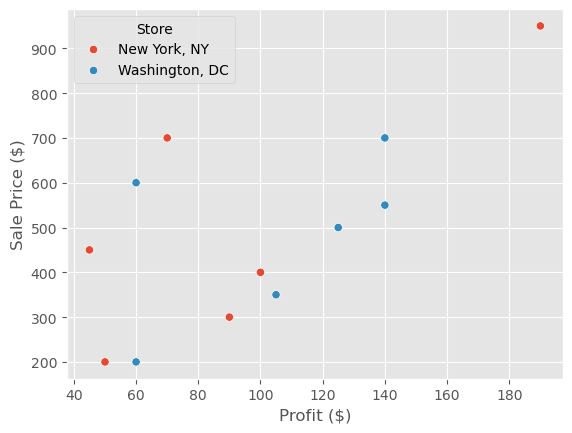

In [169]:
sns.scatterplot(data=dt, y='Sale Price ($)', x = 'Profit ($)', hue='Store')
plt.show()

10. Write a code to implement the following exploratory data analysis: (use dataset A1.csv)\
a. Find the frequency of samples for each class.\
b. Generate data description and calculate the interquartile range for all four features.\
c. Plot a histogram of feature 1 for class A.\
d. Make the box plot for feature 2 for each class separately.\
e. Violin plot for feature 3 for each class separately.\
f. Scatter plots between feature 1 and feature 3 showing classes separately.\
g. Contour plot between feature 1 and feature 4 showing classes separately.\
h. Hexagonal bin plot for class A between feature 2 and 4.\
i. Correlation matrix for the four features.\
j. Pair plot for the four features showing classes separately


In [170]:
dat = pd.read_csv('AI.csv')
dat.head()

,Sample Number,Classes,Feature 1,Feature 2,Feature 3,Feature 4,Sex
0,1,A,39.2,18.6,190,4250,MALE
1,2,B,45.2,13.8,215,4750,FEMALE
2,3,C,51.9,19.5,206,3950,MALE
3,4,A,42.8,18.5,195,4250,MALE
4,5,B,42.6,13.7,213,4950,FEMALE


In [171]:
# part a: frequency counts of each class (A,B,C)
dat['Classes'].value_counts()

Classes
A    151
B    123
C     68
Name: count, dtype: int64

In [176]:
# part b: data description, interquartile ranges
k = dat.drop(['Sample Number','Classes','Sex'],axis=1)
m = k.describe()
print(m)
print('\nInterquartile Range for all features: ')
iqr = m.iloc[6]-m.iloc[4]
print(iqr)

        Feature 1   Feature 2   Feature 3    Feature 4
count  342.000000  342.000000  342.000000   342.000000
mean    43.921930   17.151170  200.915205  4201.754386
std      5.459584    1.974793   14.061714   801.954536
min     32.100000   13.100000  172.000000  2700.000000
25%     39.225000   15.600000  190.000000  3550.000000
50%     44.450000   17.300000  197.000000  4050.000000
75%     48.500000   18.700000  213.000000  4750.000000
max     59.600000   21.500000  231.000000  6300.000000

Interquartile Range for all features: 
Feature 1       9.275
Feature 2       3.100
Feature 3      23.000
Feature 4    1200.000
dtype: float64


<Axes: xlabel='Feature 1', ylabel='Count'>

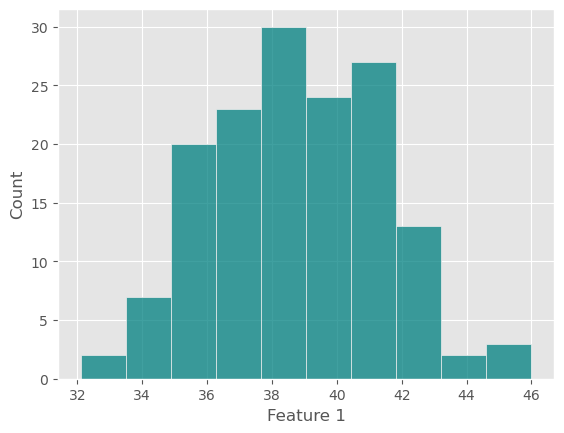

In [182]:
# part c: histogram for feature 1 of class A
df1ca = dat[dat['Classes'] == 'A']
sns.histplot(data=df1ca['Feature 1'], color='teal')

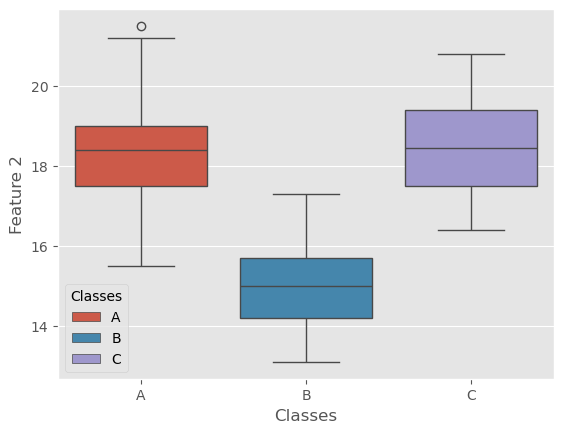

In [187]:
# part d: classwise boxplot of feature 2
sns.boxplot(data=dat, x='Classes', y='Feature 2', hue='Classes',legend='brief')
plt.show()

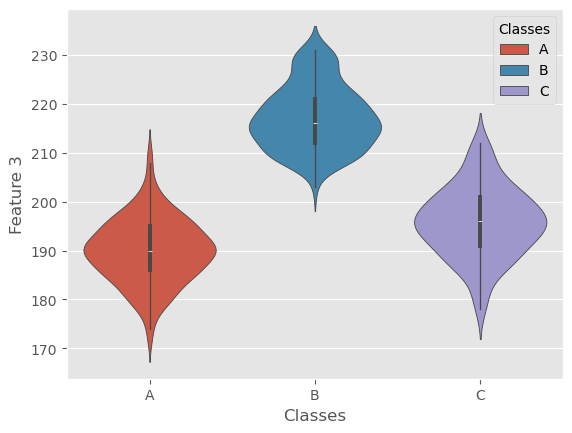

In [190]:
# part e: classwise violin plot of feature 3
sns.violinplot(data=dat, x='Classes', y='Feature 3', hue='Classes', legend='brief')
plt.show()

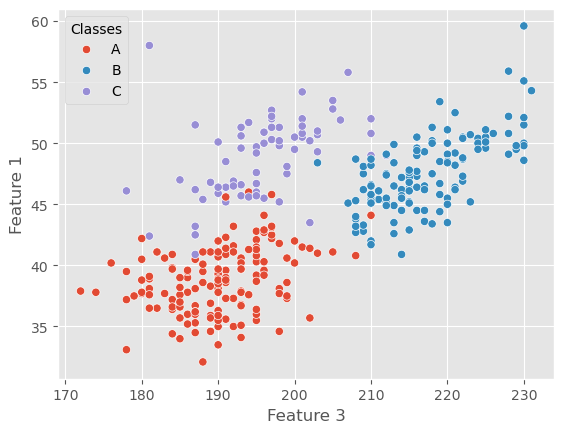

In [192]:
# part f: scatter plots b/w feature 1 and 3, classwise 
sns.scatterplot(data=dat, x='Feature 3', y='Feature 1', hue='Classes', legend='brief')
plt.show()

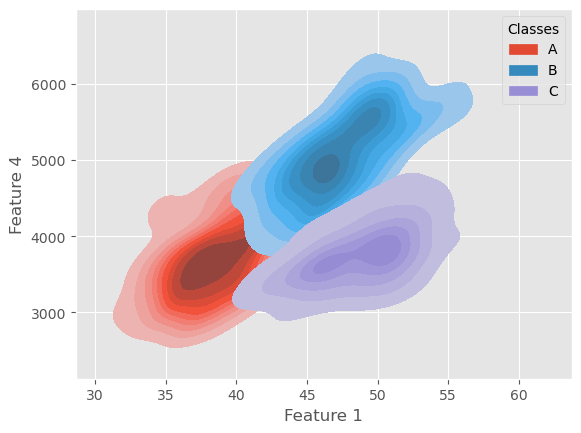

In [194]:
# part g: contour plot between feature 1 and 4, separated classwise
sns.kdeplot(data=dat, x='Feature 1', y='Feature 4', hue='Classes', fill=True)
plt.show()

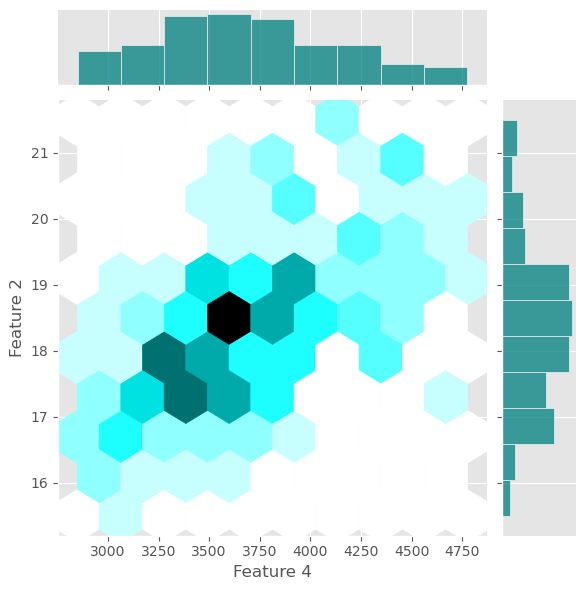

In [196]:
# part h: hexagonal bin plot for class A, between feature 2 and 4
sns.jointplot(data=dat[dat['Classes'] == 'A'], x='Feature 4', y='Feature 2', kind='hex', color='teal')
plt.show()

           Feature 1  Feature 2  Feature 3  Feature 4
Feature 1   1.000000  -0.235053   0.656181   0.595110
Feature 2  -0.235053   1.000000  -0.583851  -0.471916
Feature 3   0.656181  -0.583851   1.000000   0.871202
Feature 4   0.595110  -0.471916   0.871202   1.000000


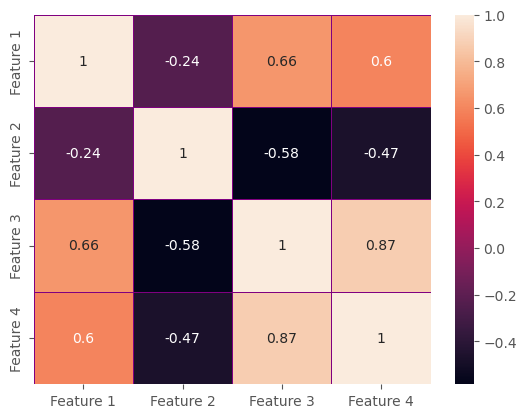

In [205]:
# part i: correlation matrix for 4 features

k = dat.drop(['Sample Number','Classes','Sex'],axis=1)
l = k.corr()
print(l)

sns.heatmap(data=l, annot=True, linewidths=.5, linecolor='purple')
plt.show()

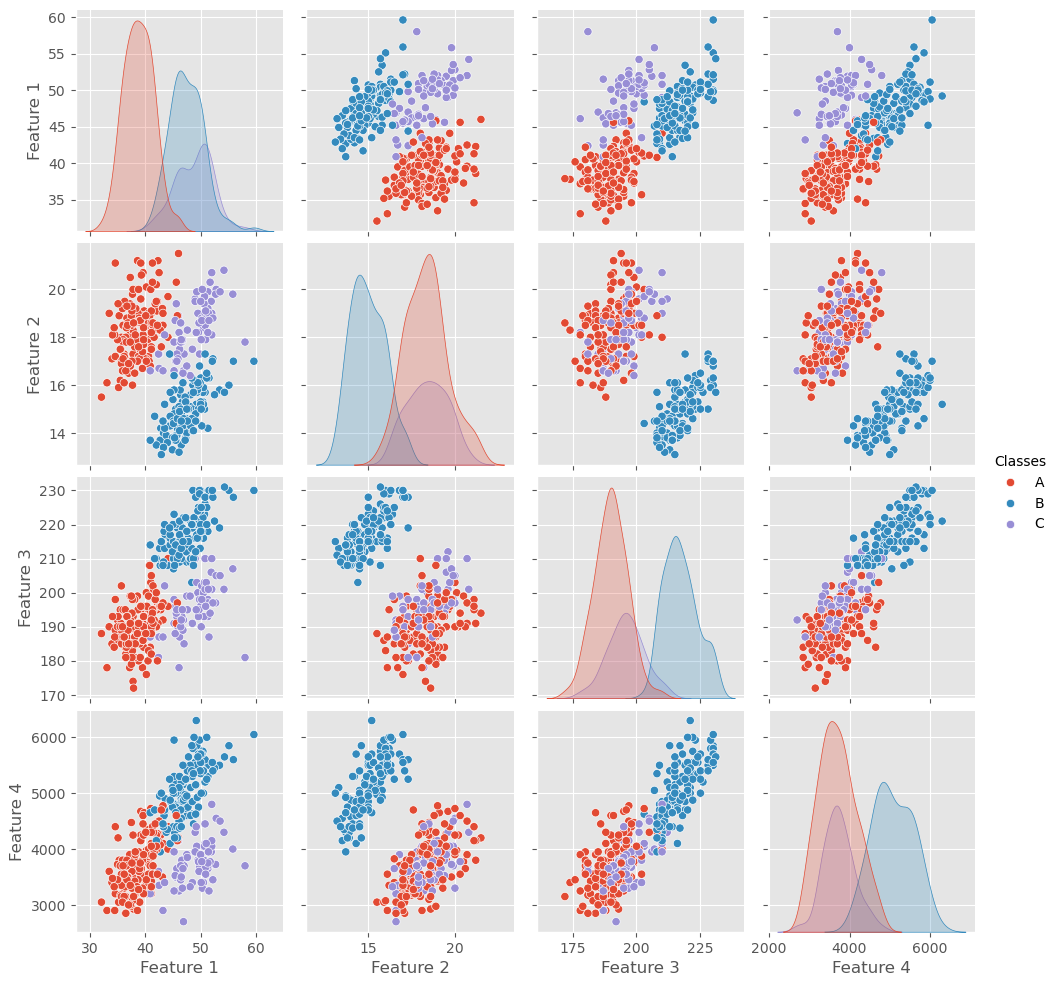

In [209]:
# part j: pairplot the four features, showing classes separately
dim = dat.drop(['Sample Number','Sex'], axis=1)
sns.pairplot(data=dim, hue='Classes')
plt.show()